# **Image Classfication using Texture**

In [9]:
!pip install mahotas

In [10]:

!git clone https://github.com/coolsankalp/Artificial-Intelligence.git

fatal: destination path 'Artificial-Intelligence' already exists and is not an empty directory.


In [11]:
from sklearn.svm import LinearSVC
import mahotas
import glob
import cv2
from sklearn.linear_model import LogisticRegression
from google.colab.patches import cv2_imshow

In [12]:
data = []
labels = []

In [13]:
for imagePath in glob.glob("/content/Artificial-Intelligence/HaralickTexture/Jaguar/Training" + "/*.jpg"):
	# load the image, convert it to grayscale, and extract the texture
	# name from the filename
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	texture = imagePath[imagePath.rfind("/") + 1:].split("_")[0]
	print(texture)

	# extract Haralick texture features in 4 directions, then take the
	# mean of each direction
	features = mahotas.features.haralick(image).mean(axis=0)

	# update the data and labels
	data.append(features)
	labels.append(texture)

Hardware
Animal
Hardware
Animal
Car
Hardware
Animal
Car
Car
Hardware
Animal
Car


In [14]:
print("[INFO] training model...")
model = LogisticRegression()
model.fit(data, labels)
print("[INFO] classifying...")

[INFO] training model...
[INFO] classifying...


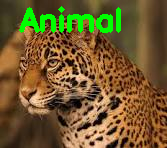

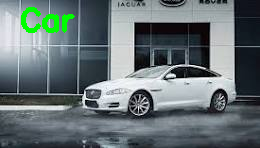

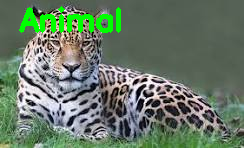

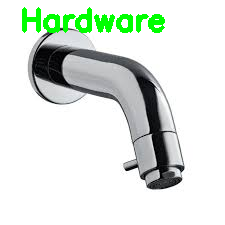

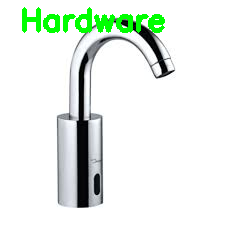

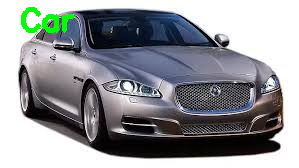

In [15]:
for imagePath in glob.glob("/content/Artificial-Intelligence/HaralickTexture/Jaguar/Testing"+ "/*.jpg"):
	# load the image, convert it to grayscale, and extract Haralick
	# texture from the test image
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	features = mahotas.features.haralick(gray).mean(axis=0)

	# classify the test image
	pred = model.predict(features.reshape(1, -1))[0]
	cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
		(0, 255, 0), 3)

	# show the output image
	cv2_imshow(image)